# 04_SHAP (SHapley Additive exPlanations) - Kernel SHAP
### [shap](https://github.com/slundberg/shap): A game theoretic approach to explain the output of any machine learning model.

<img src="slide_image/shap_header.svg" width=720/>

In [5]:
!pip install imblearn shap -q

In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from data import Cervical_DataLoader, Bike_DataLoader

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Classification Problem

### Explore the dataset - Risk Factors for Cervical Cancer
#### Features
- Age: 年齡（歲）
- Number of sexual partners: 性伴侶數量
- First sexual intercourse: 首次性行為（歲）
- Num of pregnancies: 懷孕次數
- Smokes: 吸菸與否
- Smokes (years): 煙齡（年）
- Hormonal Contraceptive: 是否服用激素避孕藥
- Hormonal Contraceptives (years): 服用激素避孕藥的時間（年） 
- IUD: 是否有宮內節育器 
- IUD (years): 使用宮內節育器 (IUD) 的年數
- STDs: 是否患有性傳播疾病
- STDs (number): 患有幾個性傳播疾病
- STDs: Number of diagnosis: 性病診斷次數
- STDs: Time since first diagnosis: 第一次性病診斷後到現在的時間
- STDs: Time since last diagnosis: 上次性病診斷到現在的時間

#### Labels
- Biopsy: 健康與否

In [3]:
# Load and preprocess data
data_loader = Cervical_DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()

# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
print(X_train.shape)
print(X_test.shape)

(686, 17)
(172, 17)


In [4]:
# Oversample the train data
X_train, y_train = data_loader.oversample(X_train, y_train)
print("After oversampling:", X_train.shape)

After oversampling: (1286, 17)


### Classification Moldes
- Logistic Regression
- Decision Tree for Classification
- Xgboost for Classification

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#### Logistic Regression

In [46]:
# Fit logistic regression model
lr = LogisticRegression(random_state=2022, penalty='l1', solver='liblinear')
lr.fit(X_train.values, y_train.values)
print("Training finished.")

# Evaluate logistic regression model
y_pred = lr.predict(X_test.values)
print(f"F1 Score: {round(f1_score(y_test, y_pred, average='macro'), 2)}")
print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}")

Training finished.
F1 Score: 0.48
Accuracy: 0.7


###  Kernel SHAP to explain Logistic Regression

In [47]:
import shap
shap.initjs()

In [48]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(model=lr.predict_proba, data=X_train)
shap_values = explainer.shap_values(X=X_test, nsamples=100)

Using 1286 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/172 [00:00<?, ?it/s]

In [49]:
print(f'length of SHAP values: {len(shap_values)}')
print(f'Shape of each element: {shap_values[0].shape}')

length of SHAP values: 2
Shape of each element: (172, 17)


#### Global interpretability
- 點的顏色: Feature value 的大小，越紅越大、越藍越小
- X 軸: 該點對於 shap value 的影響，也就是對預測值的影響。
- Y 軸: 各個 features

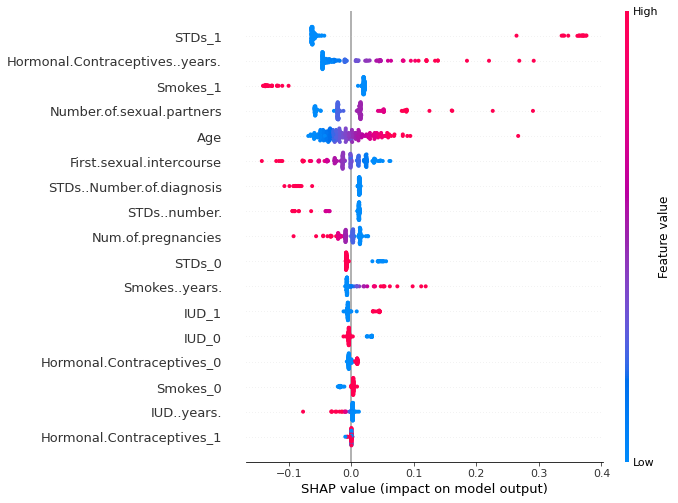

In [50]:
shap.summary_plot(shap_values[1], X_test)

#### Local interpretability

Explain a single prediction from the test set

In [51]:
# plot the SHAP values for output of the first instance
print(f'Prediction for 1st sample in X_test: {xgbc.predict_proba(X_test.iloc[[0], :].values)[0]}')
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])

Prediction for 1st sample in X_test: [0.9139003  0.08609968]


In [52]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

Explain all the predictions in the test set

In [53]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

#### Decision Tree for Classification

In [54]:
# Fit decision tree for classification model
ct = DecisionTreeClassifier(random_state=2022)
ct.fit(X_train.values, y_train.values)
print("Training finished.")
y_pred = ct.predict(X_test.values)
print(f"F1 Score: {round(f1_score(y_test, y_pred, average='macro'), 2)}")
print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}")

Training finished.
F1 Score: 0.54
Accuracy: 0.87


###  Kernel SHAP to explain Decision Tree

In [55]:
import shap
shap.initjs()

In [56]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(model=ct.predict_proba, data=X_train)
shap_values = explainer.shap_values(X=X_test, nsamples=100)

Using 1286 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/172 [00:00<?, ?it/s]

In [57]:
print(f'length of SHAP values: {len(shap_values)}')
print(f'Shape of each element: {shap_values[0].shape}')

length of SHAP values: 2
Shape of each element: (172, 17)


#### Global interpretability
- 點的顏色: Feature value 的大小，越紅越大、越藍越小
- X 軸: 該點對於 shap value 的影響，也就是對預測值的影響。
- Y 軸: 各個 features

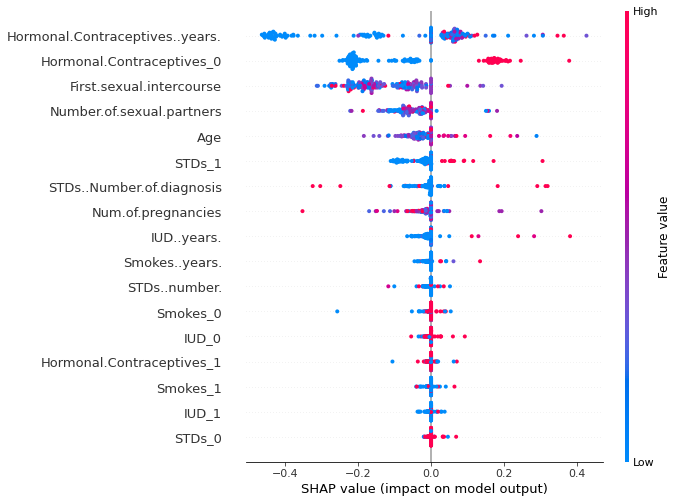

In [58]:
shap.summary_plot(shap_values[1], X_test)

#### Local interpretability

Explain a single prediction from the test set

In [59]:
# plot the SHAP values for output of the first instance
print(f'Prediction for 1st sample in X_test: {xgbc.predict_proba(X_test.iloc[[0], :].values)[0]}')
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])

Prediction for 1st sample in X_test: [0.9139003  0.08609968]


In [60]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

Explain all the predictions in the test set

In [61]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

#### XGB for Classification

In [62]:
# Fit xgboost for classification model
xgbc = XGBClassifier(random_state=2022)
xgbc.fit(X_train.values, y_train.values)
print("Training finished.")
y_pred = xgbc.predict(X_test.values)
print(f"F1 Score: {round(f1_score(y_test, y_pred, average='macro'), 2)}")
print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}")

Training finished.
F1 Score: 0.55
Accuracy: 0.92


###  Kernel SHAP to explain XGB

In [63]:
import shap
shap.initjs()

In [64]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(model=xgbc.predict_proba, data=X_train)
shap_values = explainer.shap_values(X=X_test, nsamples=100)

Using 1286 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/172 [00:00<?, ?it/s]

In [65]:
print(f'length of SHAP values: {len(shap_values)}')
print(f'Shape of each element: {shap_values[0].shape}')

length of SHAP values: 2
Shape of each element: (172, 17)


#### Global interpretability
- 點的顏色: Feature value 的大小，越紅越大、越藍越小
- X 軸: 該點對於 shap value 的影響，也就是對預測值的影響。
- Y 軸: 各個 features

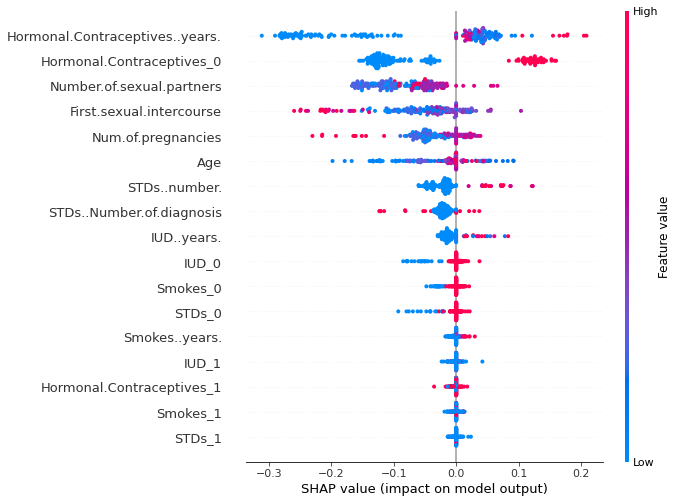

In [66]:
shap.summary_plot(shap_values[1], X_test)

#### Local interpretability

Explain a single prediction from the test set

In [67]:
# plot the SHAP values for output of the first instance
print(f'Prediction for 1st sample in X_test: {xgbc.predict_proba(X_test.iloc[[0], :].values)[0]}')
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])

Prediction for 1st sample in X_test: [0.9139003  0.08609968]


In [68]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

Explain all the predictions in the test set

In [69]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

## Regression Problem

### Explore the dataset - Bike Rentals
#### Features
- season: 季節，包含春、夏、秋、冬
- yr: 年份，2011 年或 2012 年
- mnth: 月份，1~12 月
- holiday: 當天是否為假期
- weekday: 星期幾
- workingday: 當天是否為工作日
- weathersit: 那天的天氣情況是下面幾種狀況的其中一個
    - GOOD: 晴朗
    - MISTY: 有霧、有雲
    - RAIN/SNOW/STORM: 下雨、下雪、暴風
- temp: 溫度（攝氏度）
- hum: 相對濕度百分比（0~100%）
- windspeed: 風速(km/h)
- days_since_2011: 自 2011 年 1 月 1 日（數據集中的第一天）起的天數。引入此特性是為了考慮隨時間變化的趨勢。

#### Labels
- cnt: 自行車租賃的數量，也就是此回歸任務的預測目標

In [72]:
# Load and preprocess data
data_loader = Bike_DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()
data_loader.data

# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
print(X_train.shape)
print(X_test.shape)

(584, 36)
(147, 36)


### Classification Moldes
- Logistic Regression
- Decision Tree for Classification
- Xgboost for Classification

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

#### Logistic Regression

In [46]:
# Fit logistic regression model
lr = LogisticRegression(random_state=2022, penalty='l1', solver='liblinear')
lr.fit(X_train.values, y_train.values)
print("Training finished.")

# Evaluate logistic regression model
y_pred = lr.predict(X_test.values)
print(f"F1 Score: {round(f1_score(y_test, y_pred, average='macro'), 2)}")
print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}")

Training finished.
F1 Score: 0.48
Accuracy: 0.7


###  Kernel SHAP to explain Logistic Regression

In [47]:
import shap
shap.initjs()

In [48]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(model=lr.predict_proba, data=X_train)
shap_values = explainer.shap_values(X=X_test, nsamples=100)

Using 1286 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/172 [00:00<?, ?it/s]

In [49]:
print(f'length of SHAP values: {len(shap_values)}')
print(f'Shape of each element: {shap_values[0].shape}')

length of SHAP values: 2
Shape of each element: (172, 17)


#### Global interpretability
- 點的顏色: Feature value 的大小，越紅越大、越藍越小
- X 軸: 該點對於 shap value 的影響，也就是對預測值的影響。
- Y 軸: 各個 features

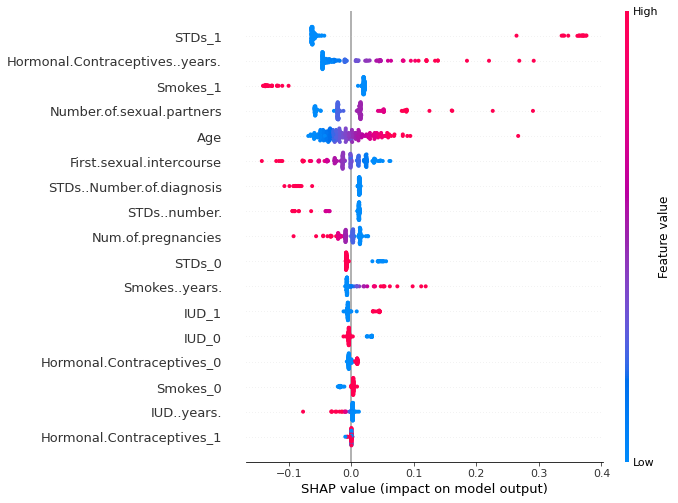

In [50]:
shap.summary_plot(shap_values[1], X_test)

#### Local interpretability

Explain a single prediction from the test set

In [51]:
# plot the SHAP values for output of the first instance
print(f'Prediction for 1st sample in X_test: {xgbc.predict_proba(X_test.iloc[[0], :].values)[0]}')
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])

Prediction for 1st sample in X_test: [0.9139003  0.08609968]


In [52]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

Explain all the predictions in the test set

In [53]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

#### Decision Tree for Classification

In [54]:
# Fit decision tree for classification model
ct = DecisionTreeClassifier(random_state=2022)
ct.fit(X_train.values, y_train.values)
print("Training finished.")
y_pred = ct.predict(X_test.values)
print(f"F1 Score: {round(f1_score(y_test, y_pred, average='macro'), 2)}")
print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}")

Training finished.
F1 Score: 0.54
Accuracy: 0.87


###  Kernel SHAP to explain Decision Tree

In [55]:
import shap
shap.initjs()

In [56]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(model=ct.predict_proba, data=X_train)
shap_values = explainer.shap_values(X=X_test, nsamples=100)

Using 1286 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/172 [00:00<?, ?it/s]

In [57]:
print(f'length of SHAP values: {len(shap_values)}')
print(f'Shape of each element: {shap_values[0].shape}')

length of SHAP values: 2
Shape of each element: (172, 17)


#### Global interpretability
- 點的顏色: Feature value 的大小，越紅越大、越藍越小
- X 軸: 該點對於 shap value 的影響，也就是對預測值的影響。
- Y 軸: 各個 features

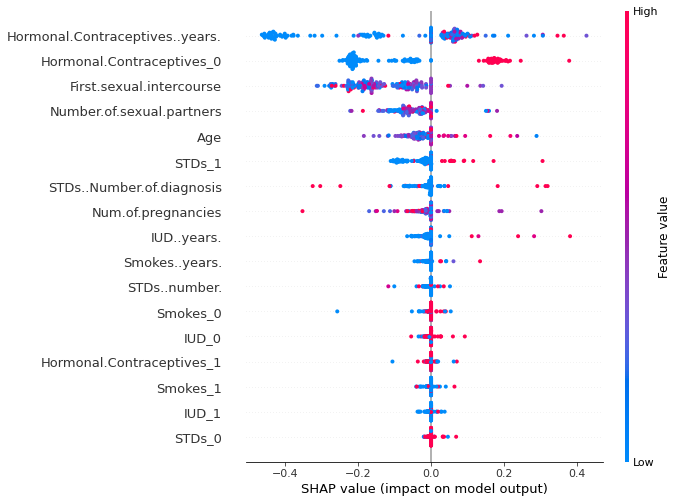

In [58]:
shap.summary_plot(shap_values[1], X_test)

#### Local interpretability

Explain a single prediction from the test set

In [59]:
# plot the SHAP values for output of the first instance
print(f'Prediction for 1st sample in X_test: {xgbc.predict_proba(X_test.iloc[[0], :].values)[0]}')
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])

Prediction for 1st sample in X_test: [0.9139003  0.08609968]


In [60]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

Explain all the predictions in the test set

In [61]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

#### XGB for Regression

In [62]:
# Fit xgb for regression model
xgbr = XGBRegressor(random_state=2022)
xgbr.fit(X_train, y_train)
print("Training finished.")
y_pred = xgbr.predict(X_test)
print(f"Root Mean Squared Error: {round(mean_squared_error(y_test, y_pred)**(1/2), 2)}")
print(f"R2: {round(r2_score(y_test, y_pred), 2)}")

Training finished.
F1 Score: 0.55
Accuracy: 0.92


###  Kernel SHAP to explain any function

In [63]:
import shap
shap.initjs()

In [ ]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(model=xgbc.predict_proba, data=X_train)
shap_values = explainer.shap_values(X=X_test, nsamples=100)

Using 1286 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/172 [00:00<?, ?it/s]

In [ ]:
print(f'length of SHAP values: {len(shap_values)}')
print(f'Shape of each element: {shap_values[0].shape}')

#### Global interpretability
- 點的顏色: Feature value 的大小，越紅越大、越藍越小
- X 軸: 該點對於 shap value 的影響，也就是對預測值的影響。
- Y 軸: 各個 features

In [ ]:
shap.summary_plot(shap_values[1], X_test)

#### Local interpretability

Explain a single prediction from the test set

In [ ]:
# plot the SHAP values for output of the first instance
print(f'Prediction for 1st sample in X_test: {xgbc.predict_proba(X_test.iloc[[0], :].values)[0]}')
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

Explain all the predictions in the test set

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)